In [1]:
import devito
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
Lx = 100.0   # width of the mantle in the x direction []
Ly = 100.0   # thickness of the mantle in the y direction []
nx = 401     # number of points in the x direction
ny = 401     # number of points in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction []
dy = Ly / (ny - 1)  # grid spacing in the y direction []
g = 9.81  # gravity acceleration [m/s^2]
alpha = 0.025 # friction coefficient for natural channels in good condition
# Maximum wave propagation time [s]
Tmax = 1.
dt = 1/4500.
nt = (int)(Tmax/dt)

In [3]:
from devito import Grid, TimeFunction, Function

grid = Grid(shape=(ny, nx), extent=(Ly, Lx))
eta = TimeFunction(name='eta', grid=grid, space_order=2)
M = TimeFunction(name='M', grid=grid, space_order=2)
N = TimeFunction(name='N', grid=grid, space_order=2)
h = Function(name='h', grid=grid)
M

M(t, x, y)

In [4]:
D = eta + h
frictionTerm = g * alpha**2/D**(7/3)*(M**2+N**2)**(-1/2)
print(frictionTerm)

0.00613125*(M(t, x, y)**2 + N(t, x, y)**2)**(-0.5)*(eta(t, x, y) + h(x, y))**(-2.33333333333333)


In [5]:
import numpy
# Define the locations along a gridline.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Define initial eta, M, N
X, Y = numpy.meshgrid(x,y) # coordinates X,Y required to define eta, h, M, N

# Define constant ocean depth profile h = 50 m
h.data[:] = 50 * numpy.ones_like(X)

# Define initial eta Gaussian distribution [m]
eta0 = 0.5 * numpy.exp(-((X-50)**2/10)-((Y-50)**2/10))

# Define initial M and N
M0 = 100. * eta0
N0 = 0. * M0

eta.data[:] = eta0.copy()
M.data[:]   = M0.copy()
N.data[:]   = N0.copy()

In [6]:
from devito import Eq, solve
pde_eta = eta.dt + M.dx + N.dy
eq_eta = Eq(eta.forward, solve(pde_eta, eta.forward), subdomain=grid.interior)
pde_M = M.dt + (M**2/D).dx + (M*N/D).dy + g*D*eta.dx + frictionTerm*M
eq_M = Eq(M.forward, solve(pde_M, M.forward), subdomain=grid.interior)
pde_N = N.dt + (M*N/D).dx + (N**2/D).dy + g*D*eta.dy + frictionTerm*N
eq_N = Eq(N.forward, solve(pde_N, N.forward), subdomain=grid.interior)
print(pde_eta)

Derivative(M(t, x, y), x) + Derivative(N(t, x, y), y) + Derivative(eta(t, x, y), t)


In [12]:
from devito import Operator

optime = Operator([eq_eta, eq_M, eq_N])

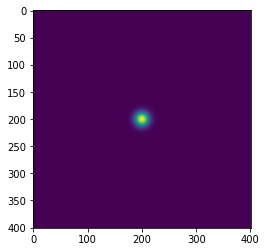

In [13]:
plt.imshow(eta.data[0])

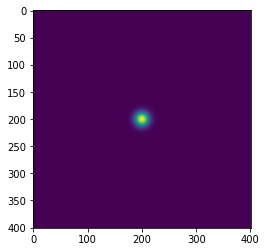

In [14]:
plt.imshow(M.data[0])

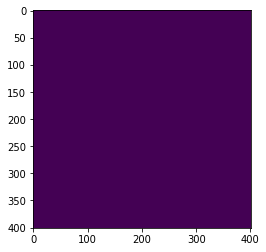

In [15]:
plt.imshow(N.data[0])

In [17]:
# Silence non-essential outputs from the solver.
configuration['log-level'] = 'ERROR'

# This is the time loop.
for step in range(0,nt):
    optime(time_m=step, time_M=step, dt=dt)

NameError: name 'configuration' is not defined

In [ ]:
eta.data

In [ ]:
help(op)